# Homework Week 7
    

### Question 1

Using the jupyter notebook for week 7, apply the lasso regression instead of the ridge regression along with the polynomial dataset that was tranformed from the Friedman1 syntatic data. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

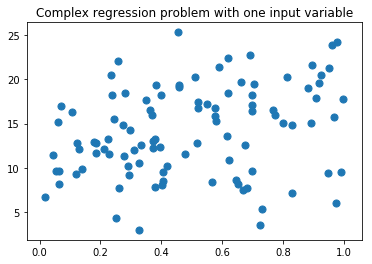

In [4]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 0], y_F1, marker= 'o', s=50)
plt.show()



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)

In [13]:
linlasso = Lasso(alpha=0.1, max_iter = 10000).fit(X_train, y_train)

In [14]:
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

lasso regression linear model intercept: 4.9488105778299865
lasso regression linear model coeff:
[ 0.          0.          5.17691465 -0.          5.76732845  0.
 -0.         -0.          0.          0.          0.          0.09657285
  5.4308293  -0.         -0.         -0.          0.          0.
  0.          0.         -0.          1.64795249  0.          0.
 -0.6559636   0.          3.71860295  0.          0.          0.
  2.20823645 -0.          0.         -0.          0.         -0.        ]
Non-zero features: 8
R-squared score (training): 0.729
R-squared score (test): 0.733

Features with non-zero weight (sorted by absolute magnitude):


### Question 2

Apply the validation curve on this problem by varying the hyperparameter alpha between 0 and 2. Use the code from week 7 to visualise the curve. How does Lasso looks compared to Ridge? is that common?

In [20]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0.000, 2, 0.1)
train_scores, test_scores = validation_curve(Lasso(), X_F1_poly, y_F1,
                                            param_name='alpha',
                                            param_range=param_range, cv=3)

/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

In [21]:
print(train_scores)

[[0.97424389 0.98190847 0.9758274 ]
 [0.67894022 0.75768551 0.76948663]
 [0.6053391  0.68356264 0.72002894]
 [0.49668632 0.57678392 0.64892504]
 [0.38412702 0.44008362 0.55225386]
 [0.31841652 0.32137432 0.46357194]
 [0.26937588 0.22238522 0.37809507]
 [0.21141844 0.14061268 0.27805222]
 [0.14454273 0.07226816 0.1992955 ]
 [0.06874957 0.         0.13686829]
 [0.         0.         0.06709671]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


In [22]:
print(test_scores)

[[ 0.77730252  0.56757298  0.85293182]
 [ 0.75543301  0.55537299  0.43235831]
 [ 0.6516071   0.50615968  0.39320835]
 [ 0.49380134  0.4187393   0.32936517]
 [ 0.34035811  0.30393105  0.24101692]
 [ 0.27440131  0.20448608  0.21990637]
 [ 0.23112947  0.12950997  0.21184696]
 [ 0.18060931  0.04993687  0.1737241 ]
 [ 0.12284236 -0.03284112  0.11323928]
 [ 0.05782778 -0.11741098  0.0373321 ]
 [-0.00272586 -0.11741098 -0.05232081]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]
 [-0.00272586 -0.11741098 -0.14207265]]


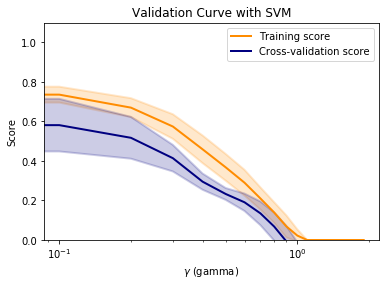

In [23]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

### Question 3

First, run the following block to set up the variables needed for later sections.

<IPython.core.display.Javascript object>


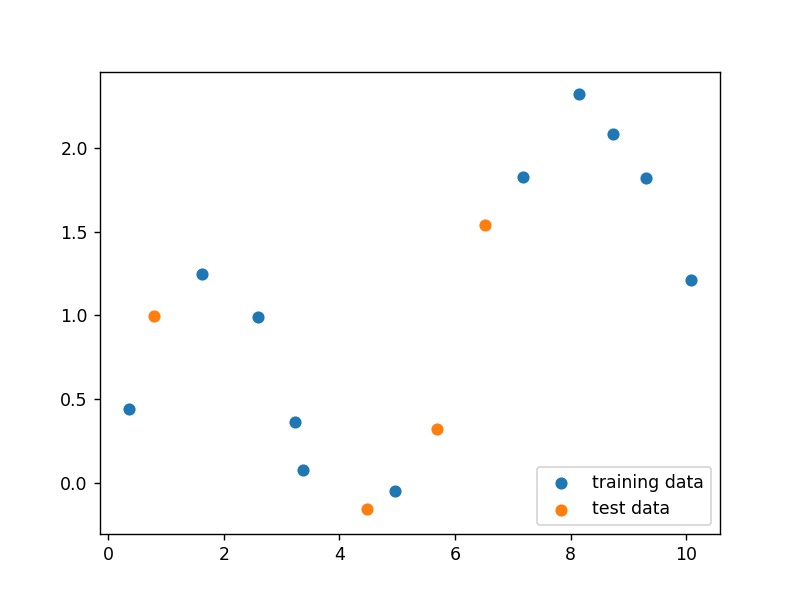

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)



    
plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);
    
    


### Question 3

Fit a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="polynomialreg1.png" style="width: 1000px;"/>

Use the plotting code belwo to compare your answers.

<br>
*Store the output of your work in a variable called _output_ it should be a numpy array with shape `(4, 100)`*

In [49]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(0)
n = 100
X_1 = np.expand_dims(x,axis=1)
X_2 = np.expand_dims(np.linspace(0,10,n),axis=1)

Output = np.arange(100)

for i in [1,3,6,9]:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_1)


    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_poly, y, random_state=0)
    linreg = LinearRegression().fit(X_train_1, y_train_1)
    X_poly_1 = poly.fit_transform(X_2)
    _output = linreg.predict(X_poly_1)
    
    Output = np.concatenate((Output,_output))

Output = Output.reshape(5,100)
Output = Output[1:,:]
    


### Plotting Questions 3

Run the below code to plot your answer in Question 3. Compare the output with the image provided.

<IPython.core.display.Javascript object>


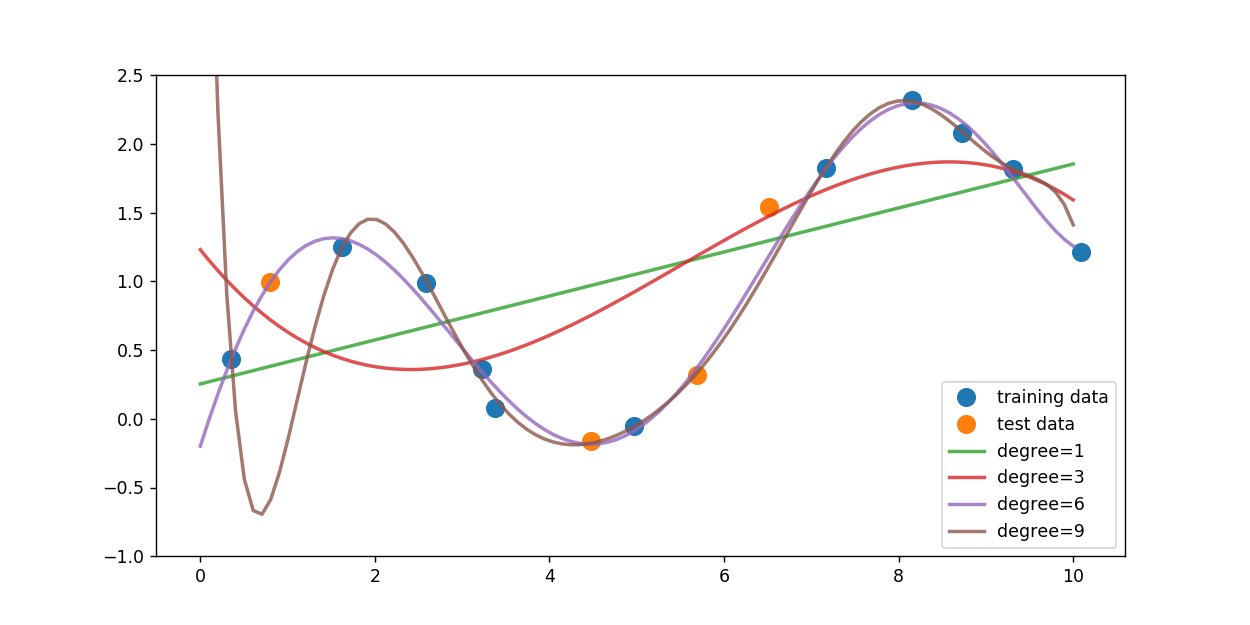

In [50]:

    
    #import matplotlib.pyplot as plt
    #%matplotlib notebook
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), Output[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
plt.ylim(-1,2.5)
plt.legend(loc=4)



### Question 4

Looking at the output (plot) of question 3 what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?
